In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

import enzope

In [4]:
def mean_exchange(r1, wi, rj, wj):
    return (wi + wj) / 2
def constant_exchange(r1, wi, rj, wj):
    return .0001

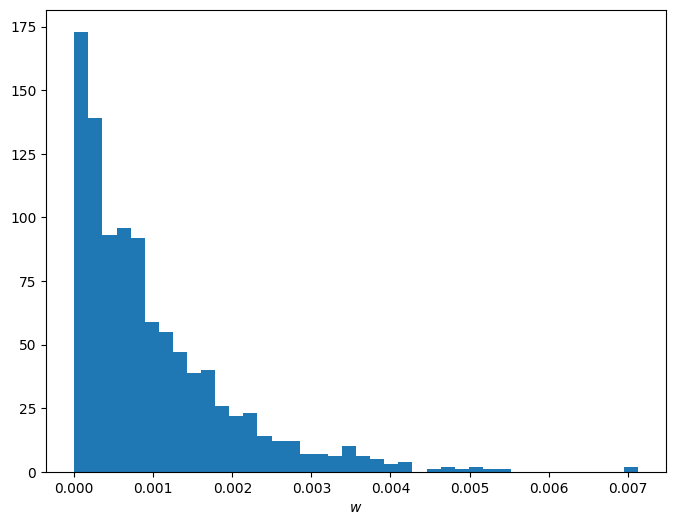

In [3]:
model = enzope.CPUModel(n_agents=1000, interaction=mean_exchange)
model.MCS(5000)
fig = enzope.distribution(model.w, bins=40)

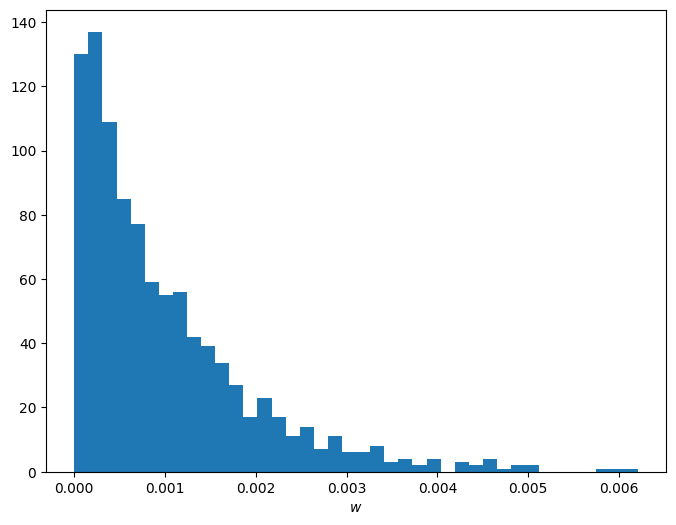

In [5]:
model = enzope.CPUModel(n_agents=1000, interaction=constant_exchange)
model.MCS(5000)
fig = enzope.distribution(model.w, bins=40)

In [5]:
def run_simulation(mcs=1000, r_frac=.7, f=.1, reps=10):
    gini1 = []
    gini2 = []
    for rep in tqdm(range(reps)):
        model1 = enzope.CPUModel(n_agents=500, f=f, measure_every=1)
        model2 = enzope.CPUModel(n_agents=500, f=f, measure_every=1)
        model2.r = np.random.uniform(0, r_frac, size=model2.n_agents)
        model1.MCS(mcs)
        model2.MCS(mcs)
        gini1.append(model1.gini)
        gini2.append(model2.gini)

    mean_1 = np.mean(gini1, axis=0)
    mean_2 = np.mean(gini2, axis=0)
    std_1 = np.std(gini1, axis=0)
    std_2 = np.std(gini2, axis=0)

    return mean_1, mean_2, std_1, std_2
    

In [6]:
r_max=.7
gini1, gini2, std1, std2 = run_simulation(mcs=200000, r_frac=r_max, f=.1, reps=15)

100%|██████████| 15/15 [3:56:48<00:00, 947.20s/it]  


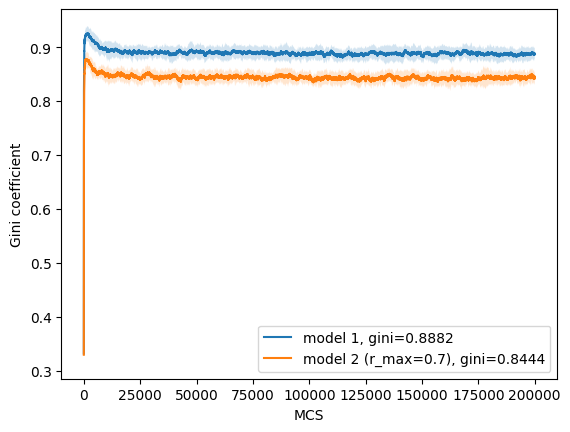

In [7]:
# plot model ginis
fig, ax = plt.subplots()
ax.plot(gini1, label=f'model 1, gini={np.mean(gini1[-1000:]):.4f}')
ax.fill_between(range(len(gini1)), gini1-std1, gini1+std1, alpha=.2)
ax.plot(gini2, label=f'model 2 (r_max={r_max}), gini={np.mean(gini2[-1000:]):.4f}')
ax.fill_between(range(len(gini2)), gini2-std2, gini2+std2, alpha=.2)
ax.legend()
ax.set_xlabel('MCS')
ax.set_ylabel('Gini coefficient');
# fig.savefig('figs/gini.png', dpi=300)

In [3]:
def run_simulation2(mcs=1000, rs=None, f=.1):
    if rs is None:
        rs = [1]
    ginis = []
    models = [enzope.CPUModel(n_agents=1000, f=f, measure_every=1) for r in rs]
    for model, r_max in zip(models, rs):
        model.r = np.random.uniform(0, r_max, size=model.n_agents)
        model.MCS(mcs)
        ginis.append(model.gini)

    return ginis

In [6]:
def run_ensemble(f=.1, reps=10, mcs=1000):
    rs = [.2, .4, .6, .8, 1.0]
    mcs = mcs
    f = f
    reps = reps

    gini_ensemble = []
    for rep in tqdm(range(reps)):
        gini_ensemble.append(run_simulation2(mcs=mcs, rs=rs, f=f))

    mean_ginis = np.mean(gini_ensemble, axis=0)
    std_ginis = np.std(gini_ensemble, axis=0)

    fig, ax = plt.subplots()
    for r, gini, std in zip(rs, mean_ginis, std_ginis):
        ax.plot(gini, label=r'$r_{m}$'+f'={r}, G={np.mean(gini[-100:]):.2f}')
        ax.fill_between(range(len(gini)), gini-std, gini+std, alpha=.2)
    ax.legend()
    ax.set_xlabel('MCS')
    ax.set_ylabel('Gini coefficient');
    ax.set_title(f'$f={f}$')
    plt.grid()
    fig.savefig(f'figs/ginis_f={f}.svg')
    plt.show()


In [17]:
for f in [0, .05, .1, .2, .3]:
    run_ensemble(f=f, reps=10, mcs=50000)

  0%|          | 0/2 [00:01<?, ?it/s]


KeyboardInterrupt: 